In [1]:
©Sandra Mahefa
#pip install opencv-python

In [32]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection
import os

# COLLECT IMAGES DATA 

In [33]:
#count number of image on folder 0
cmd = 'ls datasets_smile/train_folder/0 | wc -l'
data = os.popen(cmd)
output = data.read()
n_0 = int(output)
n_0

1238

In [34]:
#Collect DATA image NOT SMILE
train_0 = []
ytrain_0 = []
for i in range(0,n_0):
    ytrain_0.append([1,0])
    temp_img = cv2.imread('datasets_smile/train_folder/0/file{}.jpg'.format(2163+i))
    train_0.append(temp_img)
    
print("length not smile {}".format(len(train_0)))


length not smile 1238


In [35]:
#Collect DATA image SMILE

cmd = 'ls datasets_smile/train_folder/1 | wc -l'
data = os.popen(cmd)
output = data.read()
n_1 = int(output)
#-----
train_1 = []
ytrain_1 = []
for i in range(1,n_1):
    ytrain_1.append([0,1])

    if i <10:
        temp_img = cv2.imread('datasets_smile/train_folder/1/file000{}.jpg'.format(i))
        train_1.append(temp_img)
    elif i>=10 and i<100:
        temp_img = cv2.imread('datasets_smile/train_folder/1/file00{}.jpg'.format(i))
        train_1.append(temp_img)
    elif i>=100 and i<1000:
        temp_img = cv2.imread('datasets_smile/train_folder/1/file0{}.jpg'.format(i))
        train_1.append(temp_img)
    else:
        temp_img = cv2.imread('datasets_smile/train_folder/1/file{}.jpg'.format(i))
        train_1.append(temp_img)
print(len(train_1))

1561


In [36]:
x = np.array(train_0)
x.shape

(1238, 64, 64, 3)

In [37]:
x1 = np.array(train_1)
x1.shape

(1561, 64, 64, 3)

In [38]:
#concatenate the two smile and not smile data
x_train = train_0 + train_1
y_train = ytrain_0 + ytrain_1
#transform to np array
x_train = np.array(x_train)
y_train = np.array(y_train)
type(x_train)

numpy.ndarray

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

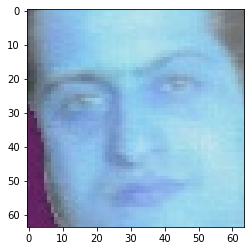

In [39]:

#PLOT ONE IMAGE
img = x_train[0]

plt.figure()
plt.imshow(img)
plt.plot

In [40]:
x_train.shape

(2799, 64, 64, 3)

Split the data with to get a train and test model 

In [41]:
import sklearn.model_selection as model_selection
X_train,X_test ,Y_train,Y_test = model_selection.train_test_split(x_train,y_train,test_size=0.2,random_state=42)
print(len(X_train), "__",len(X_test))

2239 __ 560


# create the model

# CNN model

In [87]:
cnnModel = tf.keras.models.Sequential()

In [88]:
cnnModel.add(tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),padding="valid",activation="relu",input_shape=(64,64,3)))
cnnModel.add(tf.keras.layers.MaxPool2D((2,2)))
cnnModel.add(tf.keras.layers.Conv2D(64,3, activation="relu"))
cnnModel.add(tf.keras.layers.MaxPool2D((2,2)))
cnnModel.add(tf.keras.layers.Conv2D(64,3, activation="relu"))
cnnModel.add(tf.keras.layers.MaxPool2D((2,2)))
cnnModel.add(tf.keras.layers.Flatten())
cnnModel.add(tf.keras.layers.Dense(128, activation='relu'))
cnnModel.add(tf.keras.layers.Dense(2, activation= 'softmax'))

In [89]:
cnnModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)        

In [91]:
cnnModel.compile(optimizer='adam',
              loss = tf.keras.losses.binary_crossentropy,
              metrics=['accuracy']
              )

In [93]:
cnnModel.fit(X_train,Y_train,epochs=50)

Epoch 1/50
70/70 [==============================] - 10s 143ms/step - loss: 0.0986 - accuracy: 0.9580
Epoch 2/50
70/70 [==============================] - 10s 144ms/step - loss: 0.0703 - accuracy: 0.9710
Epoch 3/50
70/70 [==============================] - 10s 144ms/step - loss: 0.0971 - accuracy: 0.9585
Epoch 4/50
70/70 [==============================] - 10s 146ms/step - loss: 0.1729 - accuracy: 0.9303
Epoch 5/50
70/70 [==============================] - 10s 145ms/step - loss: 0.1335 - accuracy: 0.9410
Epoch 6/50
70/70 [==============================] - 10s 144ms/step - loss: 0.0900 - accuracy: 0.9665
Epoch 7/50
70/70 [==============================] - 10s 146ms/step - loss: 0.1252 - accuracy: 0.9464
Epoch 8/50
70/70 [==============================] - 10s 149ms/step - loss: 0.0750 - accuracy: 0.9692
Epoch 9/50
70/70 [==============================] - 11s 152ms/step - loss: 0.0586 - accuracy: 0.9795
Epoch 10/50
70/70 [==============================] - 10s 146ms/step - loss: 0.0563 - accura

In [94]:
mocelSave = cnnModel.save('cnnModel.h5')

In [98]:
loss,accuracy = cnnModel.evaluate(X_test,Y_test)

18/18 [==============================] - 1s 35ms/step - loss: 1.6911 - accuracy: 0.8339


In [100]:
img = cv2.imread('smile0.jpg')
img = np.array([img])
#type(img)
img2 = cv2.imread('notsmile0.jpg')
img2 = np.array([img2])
print(img.shape)
smile = cnnModel.predict(img)
not_smile = cnnModel.predict(img2)
print("smile => )", smile)
print("not smile =>", not_smile)

(1, 64, 64, 3)
smile => ) [[1.4425228e-16 1.0000000e+00]]
not smile => [[1.000000e+00 4.089832e-31]]
